In [5]:
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
os.chdir('..')

fp = '/data/senegal_weather_spei_1970_2020_025x025_v3.csv'

spei_gdf = pd.read_csv(fp)

In [168]:
# Adding time stamp
spei_gdf['date_of_obs'] = pd.to_datetime(spei_gdf['year'].astype(str)+'/'+spei_gdf['month'].astype(str)+'/01')

spei_gdf.head(3)

,Unnamed: 0,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon,date_of_obs
0,0,1970,1,16.692072,-16.043186,0.0,23.194412,0.333824,22.962059,231.441176,...,26.505000,29.255000,6,0.061824,NaN,NaN,NaN,NaN,NaN,1970-01-01
1,1,1970,2,16.692072,-16.043186,0.0,25.701786,0.325000,25.835714,239.714286,...,26.521071,28.273929,6,-0.595051,NaN,NaN,NaN,NaN,NaN,1970-02-01
2,2,1970,3,16.692072,-16.043186,0.0,25.656452,0.401613,27.049355,288.419355,...,28.197419,28.140645,6,0.080660,-0.224773,NaN,NaN,NaN,NaN,1970-03-01


In [25]:
spei_gdf.columns

Index(['Unnamed: 0', 'year', 'month', 'total_precipitation', 'temperature',
       'relative_humidity', 'humidex', 'surface_solar_radiation',
       'surface_thermal_radiation', 'surface_direct_solar_radiation',
       'soil_temperature_level_1', 'soil_temperature_level_2',
       'soil_temperature_level_3', 'soil_temperature_level_4', 'spei_1mon',
       'spei_3mon', 'spei_6mon', 'spei_12mon', 'spei_24mon', 'spei_48mon'],
      dtype='object')

In [169]:
spei_gdf = spei_gdf.set_index(['id','date_of_obs','gpslat','gpslon'])
spei_gdf.head(3)

Unnamed: 0  year  month  \
id date_of_obs gpslat    gpslon                                
6  1970-01-01  16.692072 -16.043186           0  1970      1   
   1970-02-01  16.692072 -16.043186           1  1970      2   
   1970-03-01  16.692072 -16.043186           2  1970      3   

                                     total_precipitation  temperature  \
id date_of_obs gpslat    gpslon                                         
6  1970-01-01  16.692072 -16.043186                  0.0    23.194412   
   1970-02-01  16.692072 -16.043186                  0.0    25.701786   
   1970-03-01  16.692072 -16.043186                  0.0    25.656452   

                                     relative_humidity    humidex  \
id date_of_obs gpslat    gpslon                                     
6  1970-01-01  16.692072 -16.043186           0.333824  22.962059   
   1970-02-01  16.692072 -16.043186           0.325000  25.835714   
   1970-03-01  16.692072 -16.043186           0.401613  27.049355   

                                     surface_solar_radiation  \
id date_of_obs gpslat    gpslon                                
6  1970-01-01  16.692072 -16.043186               231.441176   
   1970-02-01  16.692072 -16.043186               239.714286   
   1970-03-01  16.692072 -16.043186               288.419355   

                                     surface_thermal_radiation  \
id date_of_obs gpslat    gpslon                                  
6  1970-01-01  16.692072 -16.043186                 321.000000   
   1970-02-01  16.692072 -16.043186                 349.035714   
   1970-03-01  16.692072 -16.043186                 343.258065   

                                     surface_direct_solar_radiation  \
id date_of_obs gpslat    gpslon                                       
6  1970-01-01  16.692072 -16.043186                      173.120000   
   1970-02-01  16.692072 -16.043186                      168.727857   
   1970-03-01  16.692072 -16.043186                      216.963226   

                                     soil_temperature_level_1  \
id date_of_obs gpslat    gpslon                                 
6  1970-01-01  16.692072 -16.043186                 24.512353   
   1970-02-01  16.692072 -16.043186                 27.333571   
   1970-03-01  16.692072 -16.043186                 28.188387   

                                     soil_temperature_level_2  \
id date_of_obs gpslat    gpslon                                 
6  1970-01-01  16.692072 -16.043186                 25.345588   
   1970-02-01  16.692072 -16.043186                 27.025714   
   1970-03-01  16.692072 -16.043186                 28.153226   

                                     soil_temperature_level_3  \
id date_of_obs gpslat    gpslon                                 
6  1970-01-01  16.692072 -16.043186                 26.505000   
   1970-02-01  16.692072 -16.043186                 26.521071   
   1970-03-01  16.692072 -16.043186                 28.197419   

                                     soil_temperature_level_4  spei_1mon  \
id date_of_obs gpslat    gpslon                                            
6  1970-01-01  16.692072 -16.043186                 29.255000   0.061824   
   1970-02-01  16.692072 -16.043186                 28.273929  -0.595051   
   1970-03-01  16.692072 -16.043186                 28.140645   0.080660   

                                     spei_3mon  spei_6mon  spei_12mon  \
id date_of_obs gpslat    gpslon                                         
6  1970-01-01  16.692072 -16.043186        NaN        NaN         NaN   
   1970-02-01  16.692072 -16.043186        NaN        NaN         NaN   
   1970-03-01  16.692072 -16.043186  -0.224773        NaN         NaN   

                                     spei_24mon  spei_48mon  
id date_of_obs gpslat    gpslon                              
6  1970-01-01  16.692072 -16.043186         NaN         NaN  
   1970-02-01  16.692072 -16.043186         NaN         NaN  
   1970-03-01  16.69207

### Some quick visualization plots for random slices of SPEI data

<AxesSubplot:xlabel='id,date_of_obs,gpslat,gpslon'>

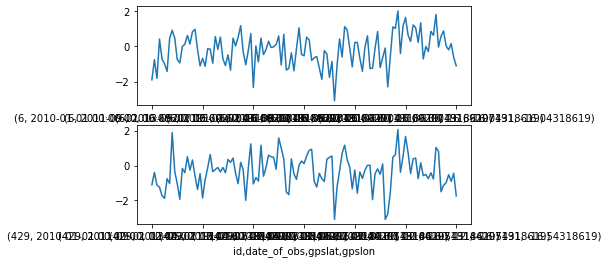

In [171]:
f, a = plt.subplots(2,1)
spei_gdf.loc[6,'2010-01-01':'2020-01-01',:,:]['spei_1mon'].plot(ax=a[0])
spei_gdf.loc[429,'2010-01-01':'2020-01-01',:,:]['spei_1mon'].plot(ax=a[1])


<AxesSubplot:xlabel='date_of_obs'>

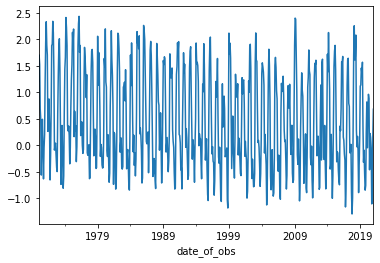

In [138]:
spei_gdf.xs((slice(12.442072),slice(-16.793186)),level=('gpslat','gpslon'))['spei_1mon'].plot()

<AxesSubplot:xlabel='id,date_of_obs'>

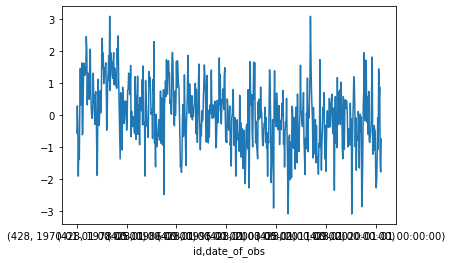

In [172]:
# SPEI 1mon is more noisy as it considers precipitation & PET from previous month

spei_gdf.xs((slice(12.442072),slice(-16.793186)),level=('gpslat','gpslon'))['spei_1mon'].plot()

<AxesSubplot:xlabel='id,date_of_obs'>

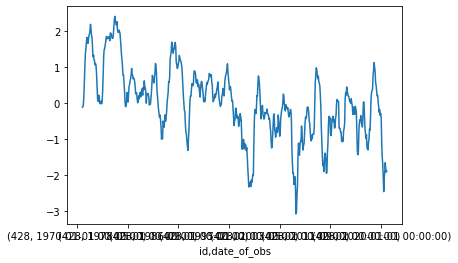

In [173]:
# SPEI 12 mon is less noisy 

spei_gdf.xs((slice(12.442072),slice(-16.793186)),level=('gpslat','gpslon'))['spei_12mon'].plot()

<AxesSubplot:xlabel='gpslat,gpslon'>

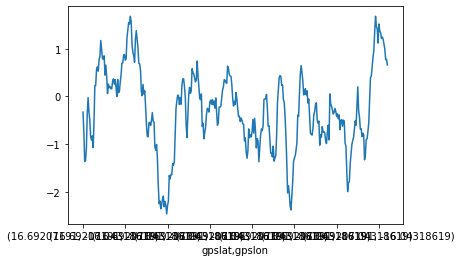

In [190]:
# Note SPEI 12 mon is (could be) quite different for a different location

spei_gdf.xs((6,slice('1990-01-01','2020-01-01')),level=('id','date_of_obs'))['spei_12mon'].plot()

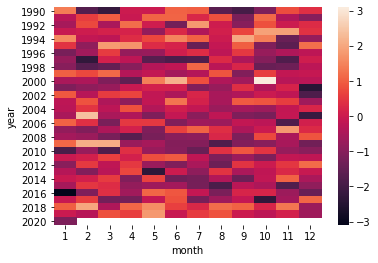

In [177]:
# Heatmap of SPEI 1 mon index for one location by month & year

#sample_df = spei_gdf.loc['1990-01-01':'2020-01-01',slice(12.442072),slice(-16.793186)][['spei_1mon','year','month']]
sample_df = spei_gdf.loc[6,'1990-01-01':'2020-01-01',:,:][['spei_1mon','year','month']]
sample_pivot = pd.pivot(sample_df,index='year',columns='month',values='spei_1mon')

sns.heatmap(sample_pivot)
plt.show()

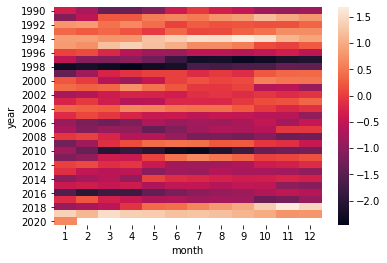

In [179]:
# Heatmap of SPEI 12 mon index
# clearly noticeable years / periods with low rain seen by black bands

sample_df = spei_gdf.loc[6,'1990-01-01':'2020-01-01',:,:][['spei_12mon','year','month']]
sample_pivot = pd.pivot(sample_df,index='year',columns='month',values='spei_12mon')

sns.heatmap(sample_pivot)
plt.show()

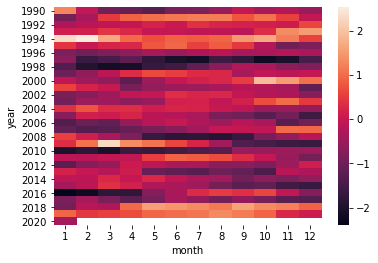

In [180]:
# Heatmap of SPEI 6 mon index

sample_df = spei_gdf.loc[6,'1990-01-01':'2020-01-01',:,:][['spei_6mon','year','month']]
sample_pivot = pd.pivot(sample_df,index='year',columns='month',values='spei_6mon')

sns.heatmap(sample_pivot)
plt.show()

#### Viz using xarray

In [182]:

# xarray needs format of pandas DF to have lat, lon & time as indices
# so that they can be set as appropriate dimensions -
# the reason for resetting grid 'id' as an index

spei_ds = xr.Dataset.from_dataframe(spei_gdf.reset_index(level='id'))
spei_ds

<xarray.Dataset>
Dimensions:                         (date_of_obs: 612, gpslat: 18, gpslon: 25)
Coordinates:
  * date_of_obs                     (date_of_obs) datetime64[ns] 1970-01-01 ....
  * gpslat                          (gpslat) float64 12.44 12.69 ... 16.44 16.69
  * gpslon                          (gpslon) float64 -17.54 -17.29 ... -11.54
Data variables:
    id                              (date_of_obs, gpslat, gpslon) float64 nan...
    Unnamed: 0                      (date_of_obs, gpslat, gpslon) float64 nan...
    year                            (date_of_obs, gpslat, gpslon) float64 nan...
    month                           (date_of_obs, gpslat, gpslon) float64 nan...
    total_precipitation             (date_of_obs, gpslat, gpslon) float64 nan...
    temperature                     (date_of_obs, gpslat, gpslon) float64 nan...
    relative_humidity               (date_of_obs, gpslat, gpslon) float64 nan...
    humidex                         (date_of_obs, gpslat, gpslon) float64 nan...
    surface_solar_radiation         (date_of_obs, gpslat, gpslon) float64 nan...
    surface_thermal_radiation       (date_of_obs, gpslat, gpslon) float64 nan...
    surface_direct_solar_radiation  (date_of_obs, gpslat, gpslon) float64 nan...
    soil_temperature_level_1        (date_of_obs, gpslat, gpslon) float64 nan...
    soil_temperature_level_2        (date_of_obs, gpslat, gpslon) float64 nan...
    soil_temperature_level_3        (date_of_obs, gpslat, gpslon) float64 nan...
    soil_temperature_level_4        (date_of_obs, gpslat, gpslon) float64 nan...
    spei_1mon                       (date_of_obs, gpslat, gpslon) float64 nan...
    spei_3mon                       (date_of_obs, gpslat, gpslon) float64 nan...
    spei_6mon                       (date_of_obs, gpslat, gpslon) float64 nan...
    spei_12mon                      (date_of_obs, gpslat, gpslon) float64 nan...
    spei_24mon                      (date_of_obs, gpslat, gpslon) float64 nan...
    spei_48mon                      (date_of_obs, gpslat, gpslon) float64 nan...

(array([ 1263.,  5405., 13730., 31258., 49327., 44293., 31195., 15547.,
         6242.,   227.]),
 array([-3.09 , -2.472, -1.854, -1.236, -0.618,  0.   ,  0.618,  1.236,
         1.854,  2.472,  3.09 ]),
 <BarContainer object of 10 artists>)

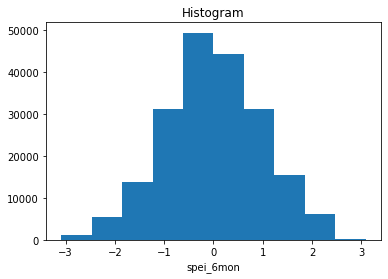

In [191]:
spei_ds['spei_6mon'].plot()

In [115]:
# Some trials on slicing xarray

spei_ds.isel(gpslat=[-1],gpslon=[-1]).spei_1mon#.plot()

#spei_ds.dropna(dim='date_of_obs',how='all')#,subset=['month'])
da_1 = spei_ds.spei_1mon.dropna(dim='date_of_obs')#.sel(gpslon=slice(12.442072),gpslat=slice(-17.543186))#.dropna(dim='date_of_obs')
da_1
#spei_ds.dropna(dim='date_of_obs',how='all')#,subset=['month'])

<xarray.DataArray 'spei_1mon' (date_of_obs: 0, gpslat: 18, gpslon: 25)>
array([], shape=(0, 18, 25), dtype=float64)
Coordinates:
  * date_of_obs  (date_of_obs) datetime64[ns] 
  * gpslat       (gpslat) float64 12.44 12.69 12.94 13.19 ... 16.19 16.44 16.69
  * gpslon       (gpslon) float64 -17.54 -17.29 -17.04 ... -12.04 -11.79 -11.54

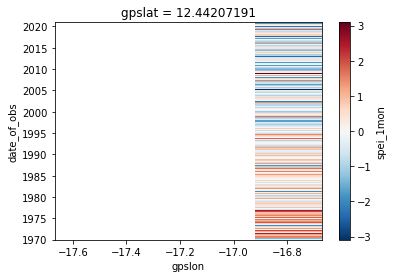

In [192]:
# Some trials on slicing xarray

#spei_ds.sel(gpslat=slice(12.442072),gpslon=slice(-16.793186)).spei_1mon.plot.line(x='date_of_obs')
spei_ds.sel(gpslat=slice(12.442072),gpslon=slice(-16.793186)).spei_1mon.dropna(dim='date_of_obs',how='all').plot()

 

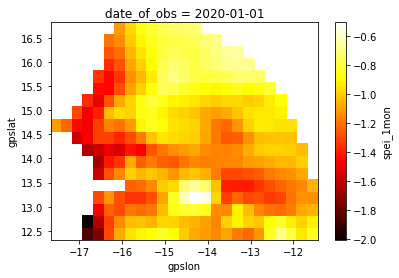

In [196]:
# SPEI for one time slice for all over Senegal

spei_ds.isel(date_of_obs=[600]).spei_1mon.plot(cmap=plt.cm.hot)

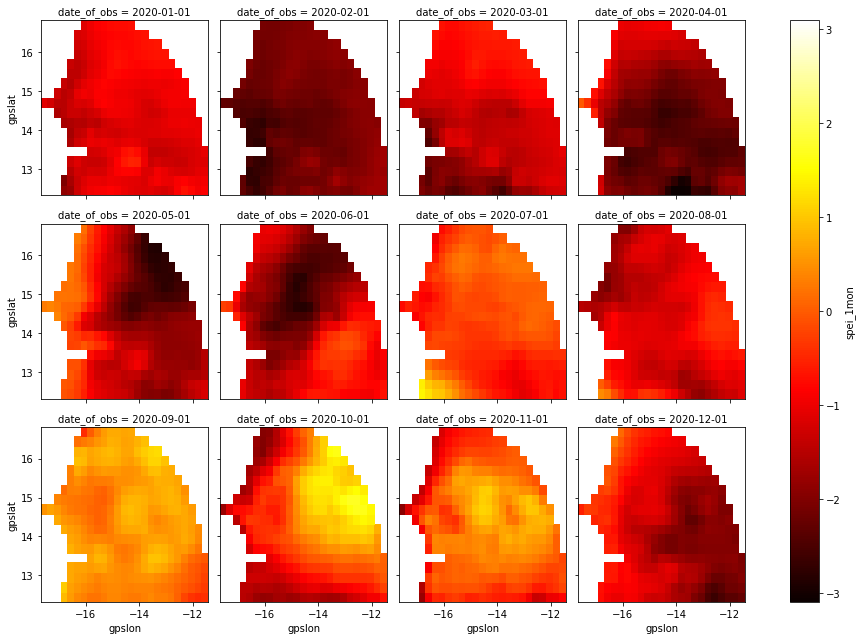

In [194]:
# SPEI for 12 months in 2020 for all over Senegal

spei_ds.isel(date_of_obs=slice(600,613,1)).spei_1mon.plot(x='gpslon',y='gpslat',col='date_of_obs',col_wrap=4,cmap=plt.cm.hot)

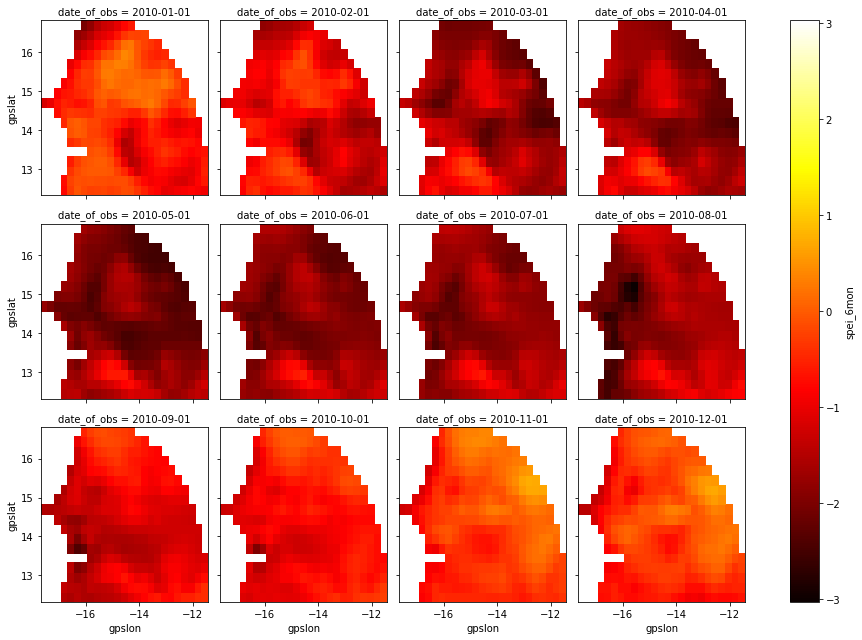

In [195]:
# SPEI for 12 months in 2010 for all over Senegal
# Notice from the heatmap earlier that 2010 was
# particularly dry year
# This can be noticed here in many more black & red grid cells

spei_ds.isel(date_of_obs=slice(480,492,1)).spei_6mon.plot(x='gpslon',y='gpslat',col='date_of_obs',col_wrap=4,cmap=plt.cm.hot)

#### Convert csv to netCDF to load into xarray

In [2]:
import pandas as pd
import numpy as np
import netCDF4

grid_locations = pd.read_csv('/data/geom/grid_025x025_deg_approx_senegal.csv')



,Name,Description,geometry


In [3]:

lons = grid_locations['X'] 
lats = grid_locations['Y'] 
nstations = ipar_wodup.shape[0]

lons_out = lons.tolist()
lats_out = lats.tolist()
#time_out = #orig.index.tolist()

# time_out = pd.to_datetime(weather_8day_ipar_wodup['year'].astype(str), format='%Y') + \
#              pd.to_timedelta(weather_8day_ipar_wodup['week'].mul(8).astype(str) + ' days')

#time_out = weather_8day_ipar_wodup.drop_duplicates('day_of_obsv',keep='first')['day_of_obsv']
time_out = weather_mon_wodup.drop_duplicates('month_ind',keep='first')['days_since_1800']
ntimeintv = time_out.size

print(nstations)
print(ntimeintv)

ncout = netCDF4.Dataset('Precip_2010_2019_monthly_v2.nc', 'w')

ncout.createDimension('division',nstations)
ncout.createDimension('time',ntimeintv)

lats = ncout.createVariable('latitude',np.dtype('float32').char,('division',))
lons = ncout.createVariable('longitude',np.dtype('float32').char,('division',))
time = ncout.createVariable('time',np.dtype('float32').char,('time',))

# required format of weather data for using climate_indices Python package
# "Valid dimension names and order: 
# [('lat', 'lon', 'time'), ('time', 'lat', 'lon'), ('time', 'division'), ('division', 'time')]"
# the format for temp & precip data as 'time' & 'division'. 
# The climate_indices package takes input as  'time' & 'division' or 'time', 'lat' & 'lon'. 
# The latter is possible only for gridded locations. In our case the IPAR data is not gridded so I used the former format. 

precip = ncout.createVariable('precip',np.dtype('float32').char,('time', 'division'))

lats[:] = lats_out
lons[:] = lons_out
time[:] = time_out

print(precip.shape)
# reshape the precipitaiton data to the right dimension 
# - time x station in this case
precip[:] = np.reshape(weather_mon_wodup['pr'].to_numpy(),(ntimeintv,nstations)) 
ncout.close()

(0, 3)